In [1]:
import tensorflow as tf


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt


In [5]:
import pydot
import seaborn as sns

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [7]:
from scikeras.wrappers import KerasClassifier

In [8]:
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

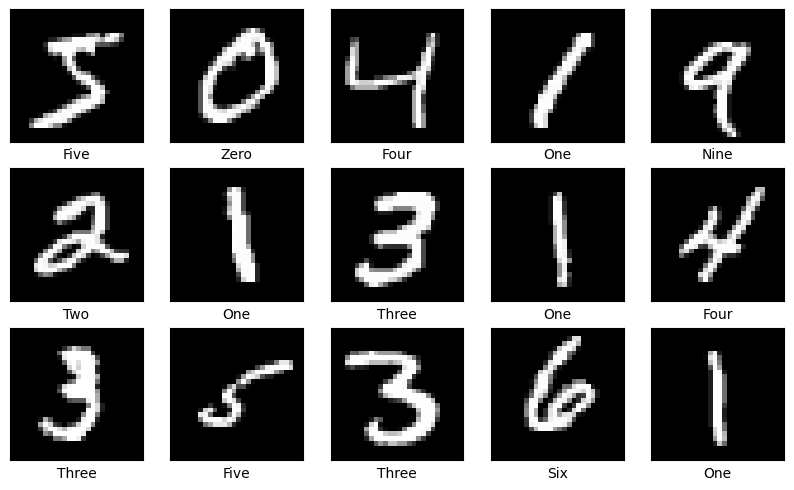

In [9]:
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [10]:
X_train_digit.shape

(60000, 28, 28)

In [11]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

In [12]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
y_train_digit=to_categorical(y_train_digit,num_classes=10)
y_test_digit=to_categorical(y_test_digit,num_classes=10)

In [14]:
y_test_digit[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

C:\Anaconda3\envs\aimj\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [18]:
history=model.fit(X_train_digit,y_train_digit,batch_size=100,epochs=10,validation_data=(X_test_digit,y_test_digit))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.7897 - loss: 1.4040 - val_accuracy: 0.8734 - val_loss: 0.3880
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8731 - loss: 0.2972 - val_accuracy: 0.8721 - val_loss: 0.2560
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8720 - loss: 0.2072 - val_accuracy: 0.8936 - val_loss: 0.2265
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8873 - loss: 0.1695 - val_accuracy: 0.8720 - val_loss: 0.1828
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8616 - loss: 0.1515 - val_accuracy: 0.8861 - val_loss: 0.1854
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8923 - loss: 0.1286 - val_accuracy: 0.8791 - val_loss: 0.1600
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8781 - loss: 0.1157 - val_accuracy: 0.8522 - val_loss: 0.1739
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8710 - loss: 0.1040 - 

In [19]:
X_test_digit

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
y_predict=model.predict(X_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [32]:
y_predicts[5]

1

In [25]:
y_predicts=np.argmax(y_predict,axis=1)

In [29]:
y_test_digit[5]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

In [31]:
y_test_digit_eval[5]

1

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

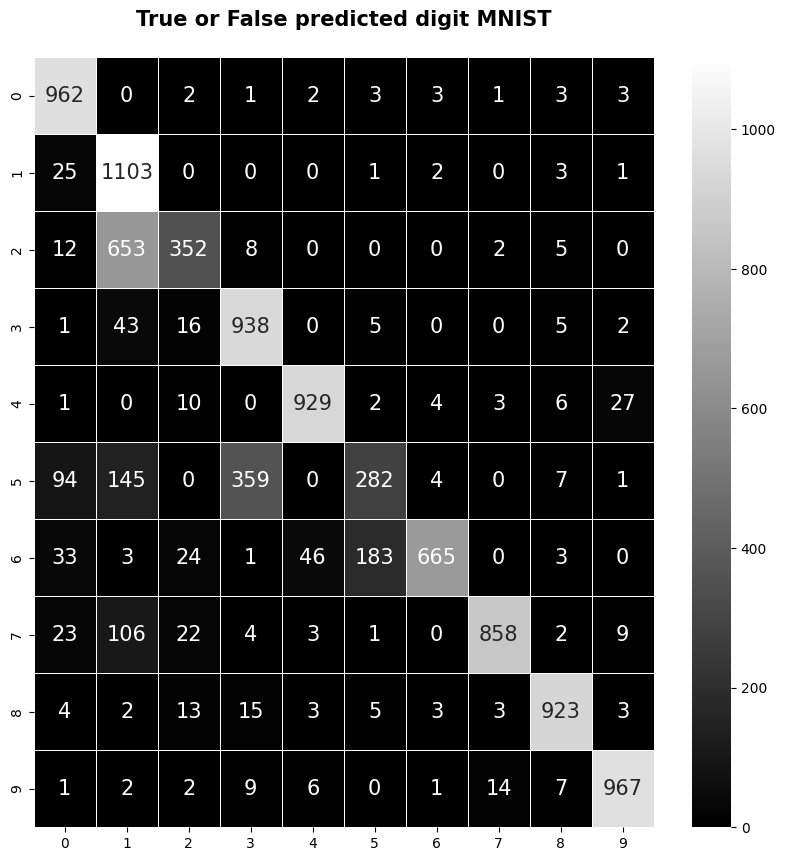

In [27]:
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)

sns.set_palette('deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       980
           1       0.54      0.97      0.69      1135
           2       0.80      0.34      0.48      1032
           3       0.70      0.93      0.80      1010
           4       0.94      0.95      0.94       982
           5       0.59      0.32      0.41       892
           6       0.98      0.69      0.81       958
           7       0.97      0.83      0.90      1028
           8       0.96      0.95      0.95       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.80     10000
   macro avg       0.83      0.79      0.78     10000
weighted avg       0.82      0.80      0.79     10000



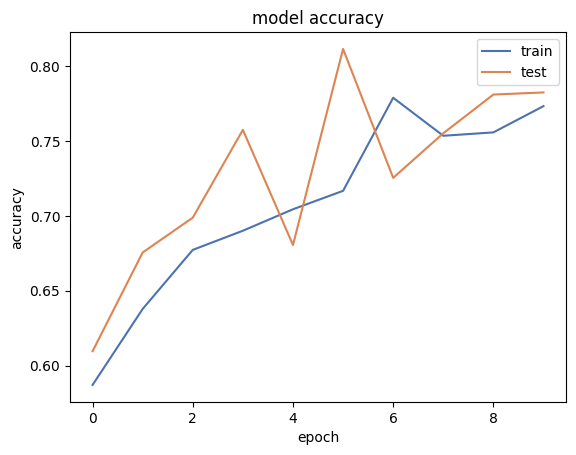

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

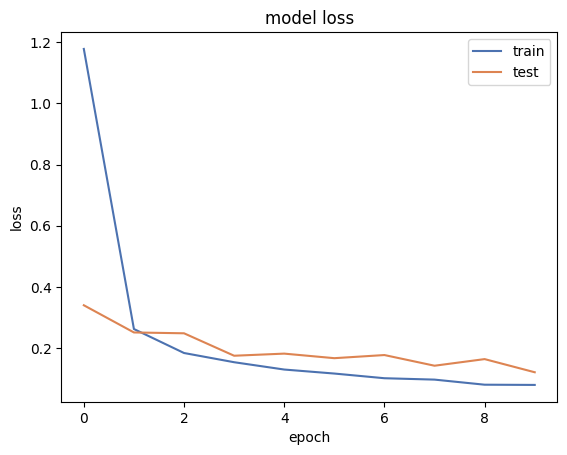

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [39]:
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


In [48]:
y_predicts_single

array([0], dtype=int64)

In [53]:
y_test_digit[55]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
y_predicts_single

array([0], dtype=int64)

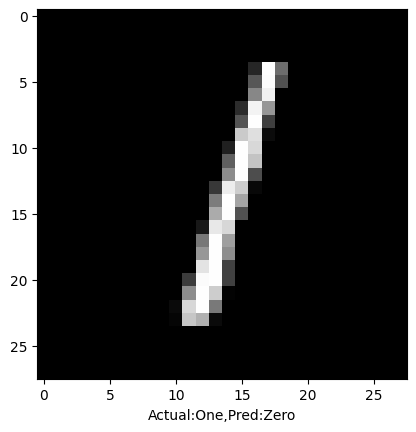

In [47]:
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()

In [54]:
y_test_digit[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [56]:
y_predicts_single

array([0], dtype=int64)